In [281]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns#seaborn

In [282]:
df = pd.read_csv('data/train.csv')

In [283]:
df = df.drop("Id", axis=1)

In [284]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [287]:
categorical_columns = df.columns[df.dtypes == 'object']

In [288]:
len(categorical_columns), len(df.columns)

(43, 80)

In [289]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import sklearn.feature_extraction

%matplotlib inline

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

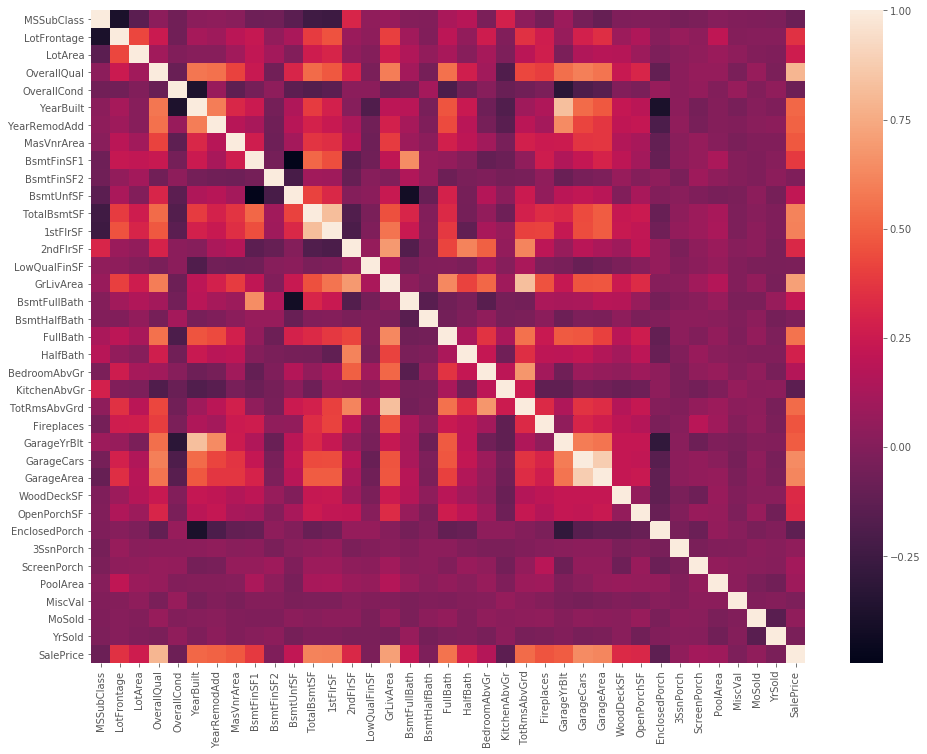

In [290]:
plt.figure(figsize=(16,12));
sns.heatmap(df.corr());

In [291]:
print(df.columns[df.isna().any()].tolist())
len (df.columns[df.isna().any()].tolist())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


19

In [292]:
df = df.fillna(df.mean())

In [272]:
print(df.columns[df.isna().any()].tolist())
len (df.columns[df.isna().any()].tolist())

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


16

In [273]:
df = df.fillna("NA")

In [274]:
print(df.columns[df.isna().any()].tolist())
len (df.columns[df.isna().any()].tolist())

[]


0

In [275]:
def code_myohe(data, feature):
    feature = str(feature)
    for i in data[feature].unique():
        i = str(i)
        data[feature + '=' + i] = (data[feature] == i).astype(int)
    data = data.drop(feature, axis=1)
    return data

def transofrm_categorial_columns(data):
    temp_df = data.copy(deep=True)
    categorical_columns = data.columns[data.dtypes == 'object']
    for column_name in categorical_columns:
        temp_df = code_myohe(temp_df, column_name)
    return temp_df

In [276]:
df_categ = transofrm_categorial_columns(df)

In [277]:
df_categ.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType=CWD', 'SaleType=ConLw', 'SaleType=Con', 'SaleType=Oth',
       'SaleCondition=Normal', 'SaleCondition=Abnorml',
       'SaleCondition=Partial', 'SaleCondition=AdjLand',
       'SaleCondition=Alloca', 'SaleCondition=Family'],
      dtype='object', length=305)

In [278]:
from IPython.display import display
pd.options.display.max_columns = None
df_categ.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning=RL,MSZoning=RM,MSZoning=C (all),MSZoning=FV,MSZoning=RH,Street=Pave,Street=Grvl,Alley=NA,Alley=Grvl,Alley=Pave,LotShape=Reg,LotShape=IR1,LotShape=IR2,LotShape=IR3,LandContour=Lvl,LandContour=Bnk,LandContour=Low,LandContour=HLS,Utilities=AllPub,Utilities=NoSeWa,LotConfig=Inside,LotConfig=FR2,LotConfig=Corner,LotConfig=CulDSac,LotConfig=FR3,LandSlope=Gtl,LandSlope=Mod,LandSlope=Sev,Neighborhood=CollgCr,Neighborhood=Veenker,Neighborhood=Crawfor,Neighborhood=NoRidge,Neighborhood=Mitchel,Neighborhood=Somerst,Neighborhood=NWAmes,Neighborhood=OldTown,Neighborhood=BrkSide,Neighborhood=Sawyer,Neighborhood=NridgHt,Neighborhood=NAmes,Neighborhood=SawyerW,Neighborhood=IDOTRR,Neighborhood=MeadowV,Neighborhood=Edwards,Neighborhood=Timber,Neighborhood=Gilbert,Neighborhood=StoneBr,Neighborhood=ClearCr,Neighborhood=NPkVill,Neighborhood=Blmngtn,Neighborhood=BrDale,Neighborhood=SWISU,Neighborhood=Blueste,Condition1=Norm,Condition1=Feedr,Condition1=PosN,Condition1=Artery,Condition1=RRAe,Condition1=RRNn,Condition1=RRAn,Condition1=PosA,Condition1=RRNe,Condition2=Norm,Condition2=Artery,Condition2=RRNn,Condition2=Feedr,Condition2=PosN,Condition2=PosA,Condition2=RRAn,Condition2=RRAe,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=TwnhsE,BldgType=Twnhs,HouseStyle=2Story,HouseStyle=1Story,HouseStyle=1.5Fin,HouseStyle=1.5Unf,HouseStyle=SFoyer,HouseStyle=SLvl,HouseStyle=2.5Unf,HouseStyle=2.5Fin,RoofStyle=Gable,RoofStyle=Hip,RoofStyle=Gambrel,RoofStyle=Mansard,RoofStyle=Flat,RoofStyle=Shed,RoofMatl=CompShg,RoofMatl=WdShngl,RoofMatl=Metal,RoofMatl=WdShake,RoofMatl=Membran,RoofMatl=Tar&Grv,RoofMatl=Roll,RoofMatl=ClyTile,Exterior1st=VinylSd,Exterior1st=MetalSd,Exterior1st=Wd Sdng,Exterior1st=HdBoard,Exterior1st=BrkFace,Exterior1st=WdShing,Exterior1st=CemntBd,Exterior1st=Plywood,Exterior1st=AsbShng,Exterior1st=Stucco,Exterior1st=BrkComm,Exterior1st=AsphShn,Exterior1st=Stone,Exterior1st=ImStucc,Exterior1st=CBlock,Exterior2nd=VinylSd,Exterior2nd=MetalSd,Exterior2nd=Wd Shng,Exterior2nd=HdBoard,Exterior2nd=Plywood,Exterior2nd=Wd Sdng,Exterior2nd=CmentBd,Exterior2nd=BrkFace,Exterior2nd=Stucco,Exterior2nd=AsbShng,Exterior2nd=Brk Cmn,Exterior2nd=ImStucc,Exterior2nd=AsphShn,Exterior2nd=Stone,Exterior2nd=Other,Exterior2nd=CBlock,MasVnrType=BrkFace,MasVnrType=None,MasVnrType=Stone,MasVnrType=BrkCmn,MasVnrType=NA,ExterQual=Gd,ExterQual=TA,ExterQual=Ex,ExterQual=Fa,ExterCond=TA,ExterCond=Gd,ExterCond=Fa,ExterCond=Po,ExterCond=Ex,Foundation=PConc,Foundation=CBlock,Foundation=BrkTil,Foundation=Wood,Foundation=Slab,Foundation=Stone,BsmtQual=Gd,BsmtQual=TA,BsmtQual=Ex,BsmtQual=NA,BsmtQual=Fa,BsmtCond=TA,BsmtCond=Gd,BsmtCond=NA,BsmtCond=Fa,BsmtCond=Po,BsmtExposure=No,BsmtExposure=Gd,BsmtExposure=Mn,BsmtExposure=Av,BsmtExposure=NA,BsmtFinType1=GLQ,BsmtFinType1=ALQ,BsmtFinType1=Unf,BsmtFinType1=Rec,BsmtFinType1=BLQ,BsmtFinType1=NA,BsmtFinType1=LwQ,BsmtFinType2=Unf,BsmtFinType2=BLQ,BsmtFinType2=NA,BsmtFinType2=ALQ,BsmtFinType2=Rec,BsmtFinType2=LwQ,BsmtFinType2=GLQ,Heating=GasA,Heating=GasW,Heating=Grav,Heating=Wall,Heating=OthW,Heating=Floor,HeatingQC=Ex,HeatingQC=Gd,HeatingQC=TA,HeatingQC=Fa,HeatingQC=Po,CentralAir=Y,CentralAir=N,Electrical=SBrkr,Electrical=FuseF,Electrical=FuseA,Electrical=FuseP,Electrical=Mix,Electrical=NA,KitchenQual=Gd,KitchenQual=TA,KitchenQual=Ex,KitchenQual=Fa,Functional=Typ,Functional=Min1,Functional=Maj1,Functional=Min2,Functional=Mod,Functional=Maj2,Functional=Sev,FireplaceQu=NA,FireplaceQu=TA,FireplaceQu=Gd,FireplaceQu=Fa,FireplaceQu=Ex,FireplaceQu=Po,GarageType=Attchd,GarageType=Detchd,GarageType=BuiltIn,GarageType=CarPort,GarageType=NA,Ga

In [279]:
df_categ.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning=RL,MSZoning=RM,MSZoning=C (all),MSZoning=FV,MSZoning=RH,Street=Pave,Street=Grvl,Alley=NA,Alley=Grvl,Alley=Pave,LotShape=Reg,LotShape=IR1,LotShape=IR2,LotShape=IR3,LandContour=Lvl,LandContour=Bnk,LandContour=Low,LandContour=HLS,Utilities=AllPub,Utilities=NoSeWa,LotConfig=Inside,LotConfig=FR2,LotConfig=Corner,LotConfig=CulDSac,LotConfig=FR3,LandSlope=Gtl,LandSlope=Mod,LandSlope=Sev,Neighborhood=CollgCr,Neighborhood=Veenker,Neighborhood=Crawfor,Neighborhood=NoRidge,Neighborhood=Mitchel,Neighborhood=Somerst,Neighborhood=NWAmes,Neighborhood=OldTown,Neighborhood=BrkSide,Neighborhood=Sawyer,Neighborhood=NridgHt,Neighborhood=NAmes,Neighborhood=SawyerW,Neighborhood=IDOTRR,Neighborhood=MeadowV,Neighborhood=Edwards,Neighborhood=Timber,Neighborhood=Gilbert,Neighborhood=StoneBr,Neighborhood=ClearCr,Neighborhood=NPkVill,Neighborhood=Blmngtn,Neighborhood=BrDale,Neighborhood=SWISU,Neighborhood=Blueste,Condition1=Norm,Condition1=Feedr,Condition1=PosN,Condition1=Artery,Condition1=RRAe,Condition1=RRNn,Condition1=RRAn,Condition1=PosA,Condition1=RRNe,Condition2=Norm,Condition2=Artery,Condition2=RRNn,Condition2=Feedr,Condition2=PosN,Condition2=PosA,Condition2=RRAn,Condition2=RRAe,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=TwnhsE,BldgType=Twnhs,HouseStyle=2Story,HouseStyle=1Story,HouseStyle=1.5Fin,HouseStyle=1.5Unf,HouseStyle=SFoyer,HouseStyle=SLvl,HouseStyle=2.5Unf,HouseStyle=2.5Fin,RoofStyle=Gable,RoofStyle=Hip,RoofStyle=Gambrel,RoofStyle=Mansard,RoofStyle=Flat,RoofStyle=Shed,RoofMatl=CompShg,RoofMatl=WdShngl,RoofMatl=Metal,RoofMatl=WdShake,RoofMatl=Membran,RoofMatl=Tar&Grv,RoofMatl=Roll,RoofMatl=ClyTile,Exterior1st=VinylSd,Exterior1st=MetalSd,Exterior1st=Wd Sdng,Exterior1st=HdBoard,Exterior1st=BrkFace,Exterior1st=WdShing,Exterior1st=CemntBd,Exterior1st=Plywood,Exterior1st=AsbShng,Exterior1st=Stucco,Exterior1st=BrkComm,Exterior1st=AsphShn,Exterior1st=Stone,Exterior1st=ImStucc,Exterior1st=CBlock,Exterior2nd=VinylSd,Exterior2nd=MetalSd,Exterior2nd=Wd Shng,Exterior2nd=HdBoard,Exterior2nd=Plywood,Exterior2nd=Wd Sdng,Exterior2nd=CmentBd,Exterior2nd=BrkFace,Exterior2nd=Stucco,Exterior2nd=AsbShng,Exterior2nd=Brk Cmn,Exterior2nd=ImStucc,Exterior2nd=AsphShn,Exterior2nd=Stone,Exterior2nd=Other,Exterior2nd=CBlock,MasVnrType=BrkFace,MasVnrType=None,MasVnrType=Stone,MasVnrType=BrkCmn,MasVnrType=NA,ExterQual=Gd,ExterQual=TA,ExterQual=Ex,ExterQual=Fa,ExterCond=TA,ExterCond=Gd,ExterCond=Fa,ExterCond=Po,ExterCond=Ex,Foundation=PConc,Foundation=CBlock,Foundation=BrkTil,Foundation=Wood,Foundation=Slab,Foundation=Stone,BsmtQual=Gd,BsmtQual=TA,BsmtQual=Ex,BsmtQual=NA,BsmtQual=Fa,BsmtCond=TA,BsmtCond=Gd,BsmtCond=NA,BsmtCond=Fa,BsmtCond=Po,BsmtExposure=No,BsmtExposure=Gd,BsmtExposure=Mn,BsmtExposure=Av,BsmtExposure=NA,BsmtFinType1=GLQ,BsmtFinType1=ALQ,BsmtFinType1=Unf,BsmtFinType1=Rec,BsmtFinType1=BLQ,BsmtFinType1=NA,BsmtFinType1=LwQ,BsmtFinType2=Unf,BsmtFinType2=BLQ,BsmtFinType2=NA,BsmtFinType2=ALQ,BsmtFinType2=Rec,BsmtFinType2=LwQ,BsmtFinType2=GLQ,Heating=GasA,Heating=GasW,Heating=Grav,Heating=Wall,Heating=OthW,Heating=Floor,HeatingQC=Ex,HeatingQC=Gd,HeatingQC=TA,HeatingQC=Fa,HeatingQC=Po,CentralAir=Y,CentralAir=N,Electrical=SBrkr,Electrical=FuseF,Electrical=FuseA,Electrical=FuseP,Electrical=Mix,Electrical=NA,KitchenQual=Gd,KitchenQual=TA,KitchenQual=Ex,KitchenQual=Fa,Functional=Typ,Functional=Min1,Functional=Maj1,Functional=Min2,Functional=Mod,Functional=Maj2,Functional=Sev,FireplaceQu=NA,FireplaceQu=TA,FireplaceQu=Gd,FireplaceQu=Fa,FireplaceQu=Ex,FireplaceQu=Po,GarageType=Attchd,GarageType=Detchd,GarageType=BuiltIn,GarageType=CarPort,GarageType=NA,Ga

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [248]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [249]:
X.shape, y.shape

((1460, 304), (1460,))

In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1547)

In [255]:
def train_validate_report(model, X_train_scaled, y_train,
        X_valid_scaled, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    predict = model.predict(X_valid_scaled);
    print('RMSE:' , np.sqrt(mean_squared_error(y_valid, predict)))
    print('R^2:' , r2_score(y_valid, predict))

    #print(pd.DataFrame(model.coef_, feature_names, columns=['coef']).sort_values(by='coef', ascending=False))

In [256]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [257]:
linreg = LinearRegression()
lasso = Lasso(random_state = 42)
ridge = Ridge(random_state = 42)
lasso_cv = LassoCV(random_state = 42)
ridge_cv = RidgeCV()

In [258]:
train_validate_report(linreg, X_train, Y_train, X_test, Y_test, X_train.columns)

RMSE: 36078.854394156864
R^2: 0.7932244381695144


In [293]:
train_validate_report(lasso, X_train, Y_train, X_test, Y_test, X_train.columns)

RMSE: 35855.20064354182
R^2: 0.7957801063156278


In [294]:
train_validate_report(ridge, X_train, Y_train, X_test, Y_test, X_train.columns)

RMSE: 32454.6402977867
R^2: 0.8326802019525542


In [295]:
train_validate_report(lasso_cv, X_train, Y_train, X_test, Y_test, X_train.columns)

RMSE: 43841.531157707395
R^2: 0.6946730367412519


In [296]:
train_validate_report(ridge_cv, X_train, Y_train, X_test, Y_test, X_train.columns)

RMSE: 34701.56650129286
R^2: 0.8087101652905802


## Предсказание значений

In [297]:
df_test = pd.read_csv('data/test.csv')

In [299]:
df_test = df_test.drop("Id", axis=1)

In [300]:
categorical_columns = df_test.columns[df_test.dtypes == 'object']

In [301]:
print(df_test.columns[df_test.isna().any()].tolist())
len (df_test.columns[df_test.isna().any()].tolist())

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


33

In [304]:
df_test = df_test.fillna(df_test.mean())
df_test = df_test.fillna("NA")

In [305]:
print(df_test.columns[df_test.isna().any()].tolist())
len (df_test.columns[df_test.isna().any()].tolist())

[]


0

In [306]:
df_test_categ = transofrm_categorial_columns(df_test)

In [310]:
df_test_categ.shape, df_categ.shape

((1459, 292), (1460, 305))

## Хьюстон, у нас проблема, не сходятся признаки из-за перевода в категориальные

In [313]:
len(df_test_categ.columns)

292

In [312]:
len(df_categ.columns)

305

In [321]:
listOfDifferentColumns = []
for elemInTest in df_test_categ.columns:
    if not elemInTest in df_categ:
        listOfDifferentColumns.append(elemInTest)
len(listOfDifferentColumns)

7

In [324]:
listOfDifferentColumns = []
for elemInTrain in df_categ.columns:
    if not elemInTrain in df_test_categ:
         listOfDifferentColumns.append(elemInTest)
len(listOfDifferentColumns)

20

In [326]:
## видимо надо добавить все признаки в недостающие и проверить что да как